##### **Data quality of the population and GDP data sets**

In [1]:
import pandas as pd

# Load population data
population_data = pd.read_csv('Population/API_SP.POP.TOTL_DS2_en_csv_v2_5454896.csv')

# Load GDP data
gdp_data = pd.read_csv('GDP/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986.csv')

In [2]:
# Check for missing values in population data
population_missing_values = population_data.isnull().sum()

# Check for missing values in GDP data
gdp_missing_values = gdp_data.isnull().sum()

# Calculate data completeness by country for population data
population_completeness = population_data.notnull().sum(axis=1)

# Calculate data completeness by country for GDP data
gdp_completeness = gdp_data.notnull().sum(axis=1)

population_missing_values.to_csv('../Intership Case Study/Output/population_missing_values.csv', index=False)
gdp_missing_values.to_csv('../Intership Case Study/Output/gdp_missing_values.csv', index=False)
population_completeness.to_csv('../Intership Case Study/Output/population_completeness.csv', index=False)
gdp_completeness.to_csv('../Intership Case Study/Output/gdp_completeness.csv', index=False)



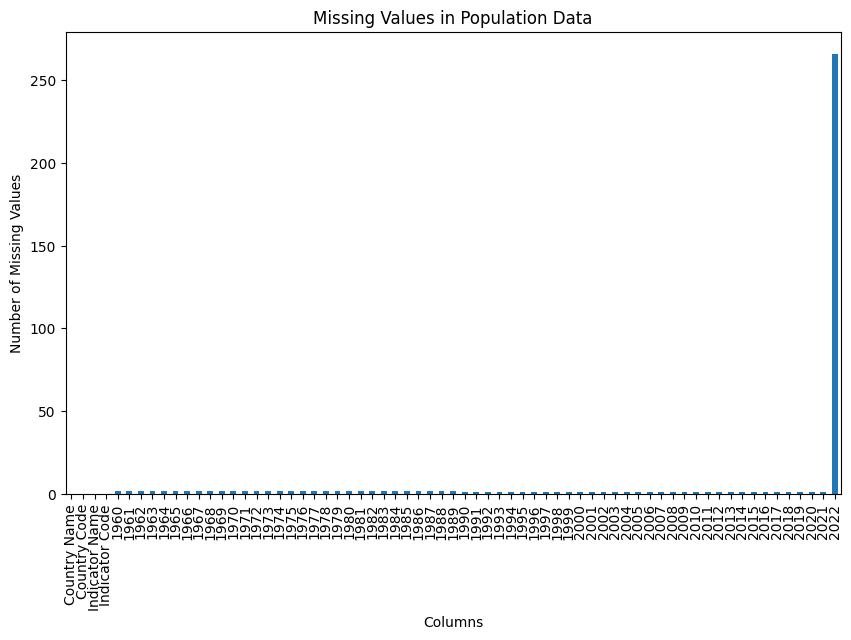

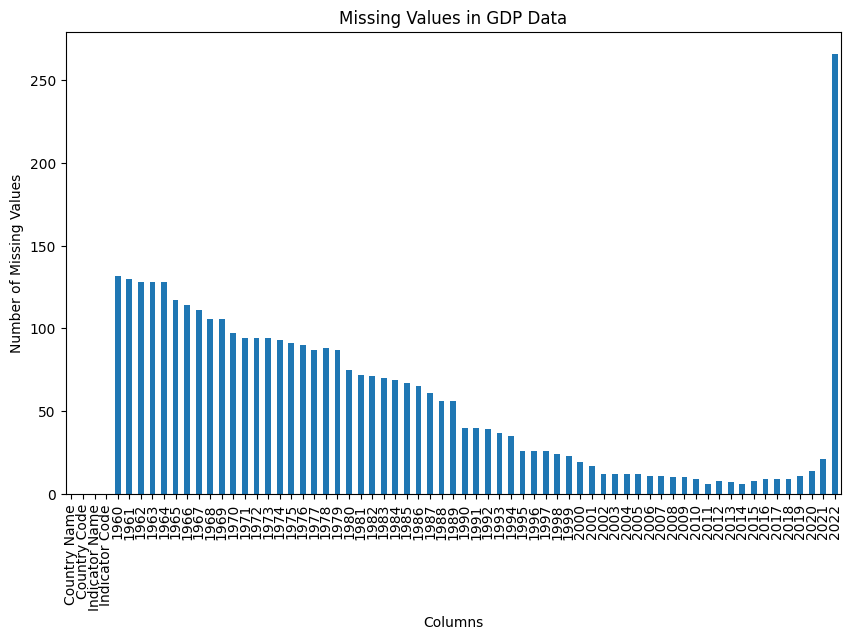

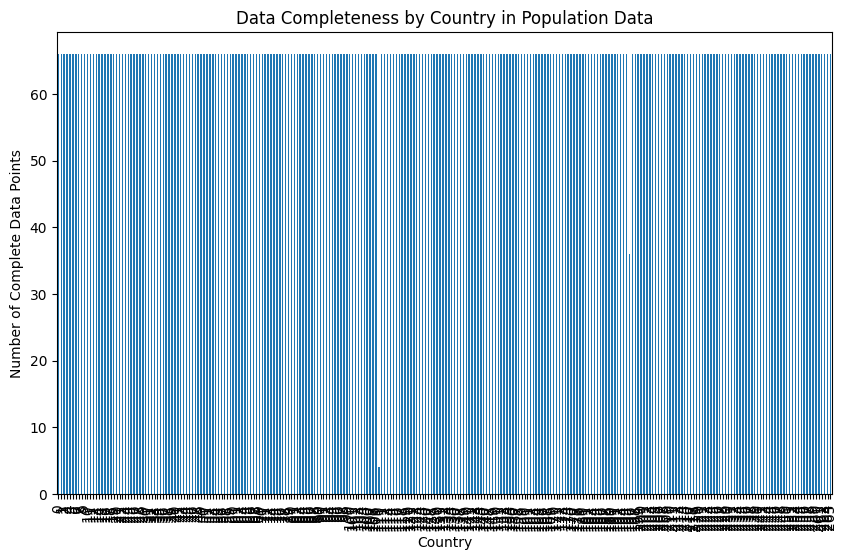

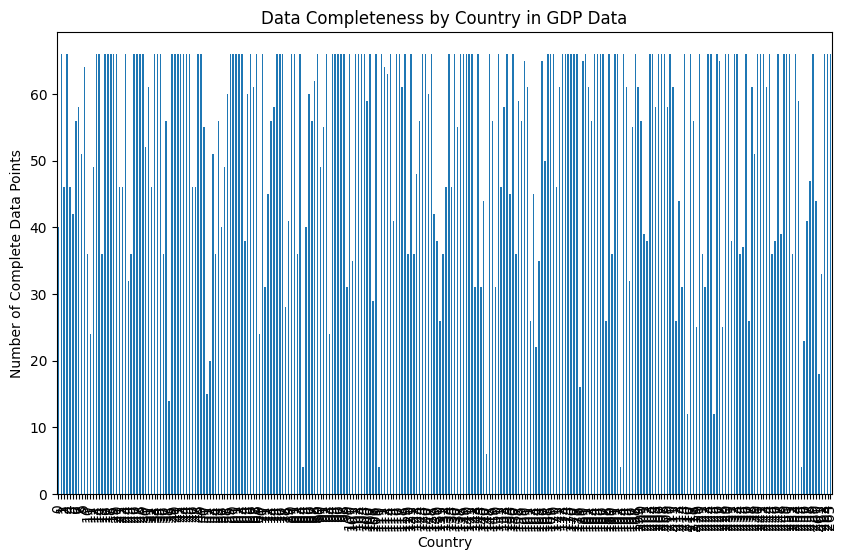

In [3]:
import matplotlib.pyplot as plt

# Bar chart for missing values in population data
plt.figure(figsize=(10, 6))
population_missing_values.plot(kind='bar')
plt.title('Missing Values in Population Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

# Bar chart for missing values in GDP data
plt.figure(figsize=(10, 6))
gdp_missing_values.plot(kind='bar')
plt.title('Missing Values in GDP Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

# Bar chart for data completeness by country in population data
plt.figure(figsize=(10, 6))
population_completeness.plot(kind='bar')
plt.title('Data Completeness by Country in Population Data')
plt.xlabel('Country')
plt.ylabel('Number of Complete Data Points')
plt.show()

# Bar chart for data completeness by country in GDP data
plt.figure(figsize=(10, 6))
gdp_completeness.plot(kind='bar')
plt.title('Data Completeness by Country in GDP Data')
plt.xlabel('Country')
plt.ylabel('Number of Complete Data Points')
plt.show()

##### **For each region (not country), calculate the population summary statistics for each year.**

In [4]:
# Load the 'populationRegion' dataset
conutry_population_region_df = pd.read_csv('Population/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5454896.csv')


In [5]:
# Merge the datasets based on the country code
merged_population_df = pd.merge(population_data, conutry_population_region_df, on='Country Code')
merged_population_df['Region'].fillna(merged_population_df.groupby('IncomeGroup')['Region'].transform('first'), inplace=True)

years = population_data.columns[4:]  # Get all column names starting from the 5th column

summary_statistics = {}  # Dictionary to store the summary statistics for each year

for year in years:
    # Group the data by region and year
    grouped_data = merged_population_df.groupby(['Region'])
    
    # Calculate the population summary statistics for the current year
    statistics = grouped_data[year].agg(['mean', 'median', 'min', 'max', 'sum'])
    
    # Store the statistics in the dictionary
    summary_statistics[year] = statistics

# Print the summary statistics for each year
for year, statistics in summary_statistics.items():
    print(f"Year: {year}")
    print(statistics)
    print()

statistics = {}
for year in years:
    # Calculate the sum for the given year and store it in the statistics dictionary
    statistics[year] = grouped_data[year].sum()

statistics_df = pd.DataFrame(statistics)

# Get the unique regions
unique_regions = sorted(merged_population_df['Region'].astype(str).unique())

# Create a DataFrame for unique regions
regions_df = pd.DataFrame({'Region': unique_regions})

# Merge the statistics DataFrames with the regions DataFrame
merged_df = pd.merge(regions_df, statistics_df, on='Region')

merged_df.to_csv('../Intership Case Study/Output/statistics.csv', index=False)


Year: 1960
                                    mean      median      min          max   
Region                                                                       
East Asia & Pacific         2.790897e+07    468573.0   4582.0  667070000.0  \
Europe & Central Asia       1.148748e+07   3770050.0   9443.0  119897000.0   
Latin America & Caribbean   5.217682e+06   1236645.5   2646.0   73092515.0   
Middle East & North Africa  5.247913e+06   1956056.0  36385.0   27034499.0   
North America               6.620825e+07  17909356.0  44400.0  180671000.0   
South Asia                  7.141038e+07  10021208.5  91650.0  445954579.0   
Sub-Saharan Africa          4.748935e+06   2936943.0  41700.0   44928342.0   

                                     sum  
Region                                    
East Asia & Pacific         1.032632e+09  
Europe & Central Asia       6.662737e+08  
Latin America & Caribbean   2.191426e+08  
Middle East & North Africa  1.049583e+08  
North America               

##### **Create a box plot displaying the population data points for each region for themost recent year.**

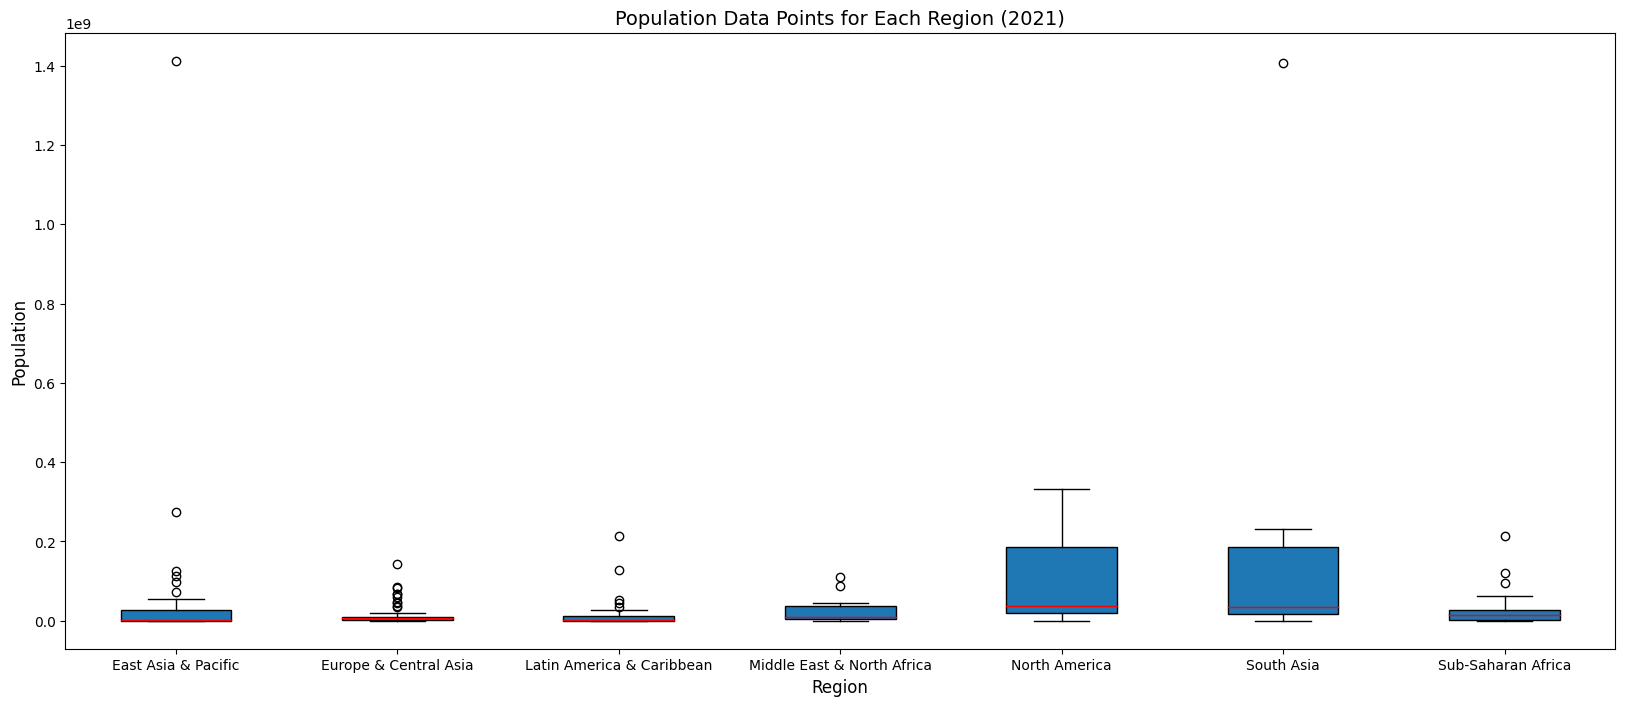

In [6]:
import matplotlib.pyplot as plt

# Select the most recent year
most_recent_year = population_data.columns[-2]  # Assuming the last second column is the most recent year

# Group the data by region and select the population for the most recent year
grouped_data = merged_population_df.groupby('Region')[most_recent_year].apply(list)

grouped_data.to_csv('../Intership Case Study/Output/grouped_data.csv', index=False)

# Create a box plot
plt.figure(figsize=(20, 8))
plt.boxplot(grouped_data.values, labels=grouped_data.index, patch_artist=True, medianprops={'color': 'red'})

# Set plot title and labels
plt.title(f"Population Data Points for Each Region ({most_recent_year})", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Population", fontsize=12)

# Display the plot
plt.show()

##### **To identify and report countries that have less than 30% of GDP data points.**

In [7]:
# load the gdpRegion dataset
conutry_gdp_region_df = pd.read_csv('GDP/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986.csv')

# Merge the datasets based on the country code
merged_gdp_df = pd.merge(gdp_data, conutry_gdp_region_df, on='Country Code')
merged_gdp_df['Region'].fillna(merged_gdp_df.groupby('IncomeGroup')['Region'].transform('first'), inplace=True)

population_summarys = {}  # Dictionary to store the summary population_summary for each year

# Calculate the percentage of available GDP data points for each country
gdp_data_points_percentage = merged_gdp_df.notna().sum(axis=1) / merged_gdp_df.shape[1] * 100

# Filter out countries with less than 30% of GDP data points
countries_with_less_than_30_percent = gdp_data_points_percentage[gdp_data_points_percentage < 30].index

# Report the list of countries
print("Countries with less than 30% of GDP data points:")
print(countries_with_less_than_30_percent)

# Drop countries from the dataset
filtered_gdp_df = merged_gdp_df.drop(countries_with_less_than_30_percent)
filtered_gdp_df
filtered_gdp_df.to_csv('../Intership Case Study/Output/filtered_gdp_df.csv', index=False)


Countries with less than 30% of GDP data points:
Index([38, 51, 84, 146, 178, 192, 215, 224, 254, 260], dtype='int64')


##### **To infill missing GDP values using the logic of estimating GDP using average GDP per capita by country and population**

In [8]:
# Merge the datasets based on the country code
merged_population_df = pd.merge(population_data, conutry_population_region_df, on='Country Code')
merged_population_df['Region'].fillna(merged_population_df.groupby('IncomeGroup')['Region'].transform('first'), inplace=True)

# Merge the population and GDP datasets
merged_df = pd.merge(merged_population_df, merged_gdp_df, on=['Country Name', 'Country Code'], suffixes=('_population', '_gdp'))

import numpy as np

# Calculate average GDP per capita
merged_df['Average_GDP_Per_Capita'] = merged_df['2019_gdp'] / merged_df['2019_population']

# Fill missing GDP values using average GDP per capita and population
merged_df['Estimated_GDP'] = np.where(merged_df['2020_gdp'].isnull(), merged_df['Average_GDP_Per_Capita'] * merged_df['2020_population'], merged_df['2020_gdp'])

# Print the updated DataFrame
merged_df
merged_df.to_csv('../Intership Case Study/Output/merged_df.csv', index=False)


##### **To calculate the % of GDP each country accounts for within its income group by year,**

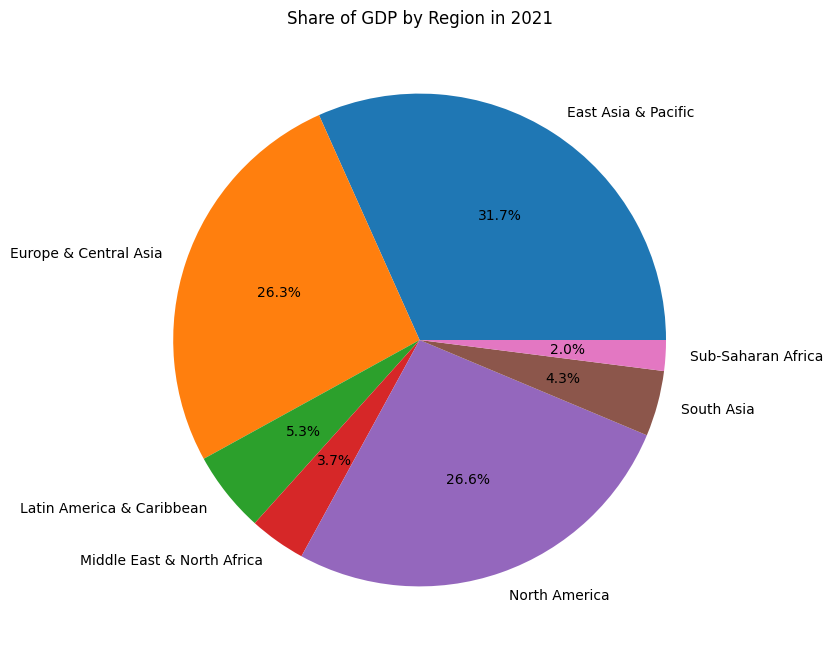

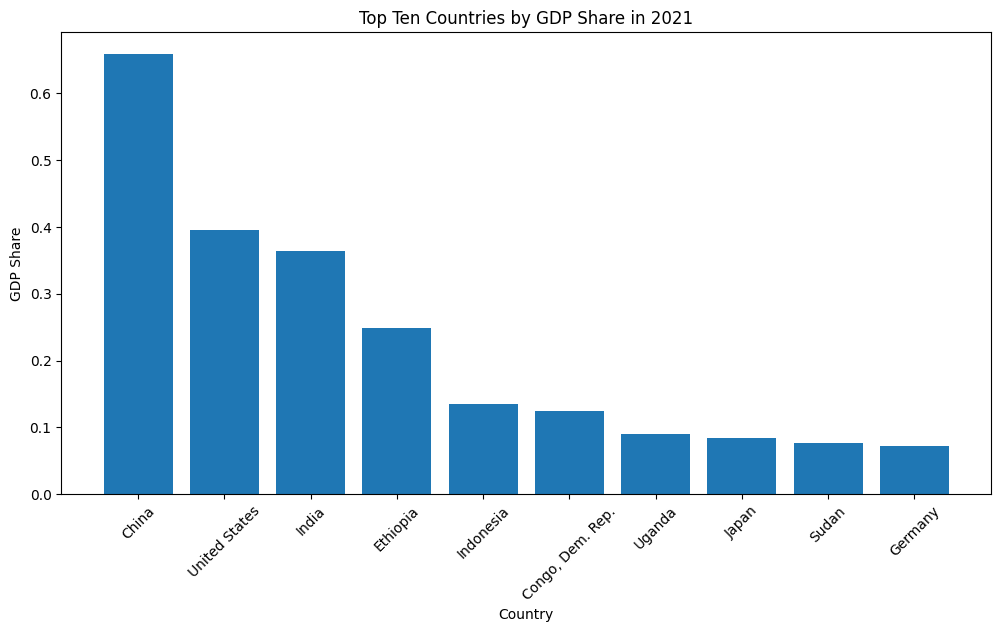

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out unnecessary columns
gdp_data_filtered = merged_gdp_df[['Country Name', 'Region', 'IncomeGroup', '2021']].copy()
population_data_filtered = merged_population_df[['Country Name', 'Region', 'IncomeGroup', '2021']].copy()

# Calculate the % of GDP each country accounts for within its income group in 2021
gdp_data_filtered['TotalGDP'] = gdp_data_filtered.groupby('IncomeGroup')['2021'].transform('sum')
gdp_data_filtered['GDPPercentage'] = gdp_data_filtered['2021'] / gdp_data_filtered['TotalGDP']

# Save the GDP percentages to a separate file
gdp_data_filtered.to_csv('gdp_percentages.csv', index=False)

# Calculate the share of GDP by region in 2022
gdp_by_region = gdp_data_filtered.groupby('Region')['2021'].sum()

# Create a pie chart to visualize the share of GDP by region in 2021
plt.figure(figsize=(8, 8))
plt.pie(gdp_by_region, labels=gdp_by_region.index, autopct='%1.1f%%')
plt.title('Share of GDP by Region in 2021')
plt.show()

# Merge GDP and population data on 'Country Name', 'Region', and 'IncomeGroup'
merged_data = pd.merge(gdp_data_filtered, population_data_filtered, on=['Country Name', 'Region', 'IncomeGroup'])

# Filter out countries with missing GDP or population data for 2021
merged_data_filtered = merged_data.dropna(subset=['2021_x', '2021_y'])

# Sort the merged data by GDP percentage in descending order for 2021
sorted_data = merged_data_filtered.sort_values('GDPPercentage', ascending=False)

# Select the top ten countries by GDP percentage for 2021
top_countries = sorted_data.head(10)

# Create a stacked bar chart showing the top ten countries by GDP percentage for 2021
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country Name'], top_countries['GDPPercentage'], align='center')
plt.xlabel('Country')
plt.ylabel('GDP Share')
plt.title('Top Ten Countries by GDP Share in 2021')
plt.xticks(rotation=45)
plt.show()


In [10]:
import os

# Filter out unnecessary columns
gdp_data_filtered = merged_gdp_df[['Country Name', 'Region', 'IncomeGroup']].copy()
population_data_filtered = merged_population_df[['Country Name', 'Region', 'IncomeGroup']].copy()
gdp_data_filtered['TotalGDP'] = 0
# Create a directory to store the GDP percentage files
os.makedirs('% of GDP', exist_ok=True)

# Iterate over each year
for year in years:
    gdp_data_filtered['TotalGDP'] = merged_gdp_df[year].groupby(merged_gdp_df['IncomeGroup']).transform('sum')
    gdp_data_filtered['GDPPercentage'] = merged_gdp_df[year] / gdp_data_filtered['TotalGDP']

    # Save the GDP percentages to a separate file for each year
    file_path = os.path.join('% of GDP', 'gdp_percentages_{}.csv'.format(year))
    gdp_data_filtered.to_csv(file_path, index=False)

In [11]:
merged_gdp_df_copy_3_year_cagr = merged_gdp_df.copy()

for year in years:
    # Create a new column for the 3-year CAGR
    merged_gdp_df_copy_3_year_cagr[f'{year}_3yr_CAGR'] = np.nan

    # Calculate the 3-year CAGR for each country
    for index, row in merged_gdp_df_copy_3_year_cagr.iterrows():
        country_name = row['Country Name']
        start_year = int(year) - 3
        end_year = int(year) - 1
        if start_year >= 1960:  # Check if start_year is within the available range
            start_gdp = row[str(start_year)]
            end_gdp = row[str(end_year)]
            if pd.notnull(start_gdp) and pd.notnull(end_gdp):  # Check if both start and end GDP values are not missing
                cagr = (end_gdp / start_gdp) ** (1 / 3) - 1  # Calculate the CAGR
                merged_gdp_df_copy_3_year_cagr.at[index, f'{year}_3yr_CAGR'] = cagr

# Print the DataFrame with the 3-year GDP CAGR for each country for each year
merged_gdp_df_copy_3_year_cagr.head()
merged_gdp_df_copy_3_year_cagr.to_csv('../Intership Case Study/Output/merged_gdp_df_copy_3_year_cagr.csv', index=False)


**To calculate the 5-year Compound Annual Growth Rate (CAGR) for GDP for each region, weighted by the population in each country, we can follow these steps:**

In [12]:
import pandas as pd

# Merge the dataframes
merged_population_gdp_df = pd.merge(merged_gdp_df, merged_population_df, on=['Country Code', 'Country Name', 'Region', 'IncomeGroup', 'SpecialNotes'])

# Save the merged dataframe as a CSV file
merged_population_gdp_df.to_csv('merged_population_gdp.csv', index=False)

# Load the merged_population_gdp_df data into a DataFrame
data = pd.read_csv('merged_population_gdp.csv')

# Group the data by region
grouped_data = data.groupby('Region')

years = population_data.columns[4:]  # Get all column names starting from the 5th column

# Create empty dictionaries to store the statistics
statistics = {}
statistics1 = {}

# Iterate over the years
for year in years:
    # Calculate the sum for the given year and store it in the statistics dictionary
    statistics[year+'_x'] = grouped_data[year+'_x'].sum()
    statistics1[year+'_y'] = grouped_data[year+'_y'].sum()

# Convert the statistics dictionaries to DataFrames
statistics_df = pd.DataFrame(statistics)
statistics_df1 = pd.DataFrame(statistics1)

# Get the unique regions
unique_regions = sorted(data['Region'].astype(str).unique())

# Create a DataFrame for unique regions
regions_df = pd.DataFrame({'Region': unique_regions})

# Merge the statistics DataFrames with the regions DataFrame
merged_df = pd.merge(regions_df, statistics_df, on='Region').merge(statistics_df1, on='Region')

# Save the merged DataFrame to a CSV file
merged_df.to_csv('./Year wise GDP and Population/statistics_with_regions.csv', index=False)



In [13]:
import pandas as pd

# Load the merged_population_gdp_df data into a DataFrame
data = pd.read_csv('./Year wise GDP and Population/statistics_with_regions.csv')

# Calculate the 5-year GDP CAGR for each region
cagr = {}
years = population_data.columns[4:-5]  # Exclude the last 5 years
for region in data['Region']:
    region_data = data[data['Region'] == region]
    gdp_values = region_data[years+'_x'].values.flatten()
    population_values = region_data[years + '_y'].values.flatten()
    
    # Calculate the weighted average GDP growth rate
    weighted_gdp_growth = sum(gdp_values * population_values) / sum(population_values)
    
    # Calculate the CAGR
    cagr[region] = (weighted_gdp_growth / gdp_values[0]) ** (1 / len(years)) - 1

# Convert the CAGR dictionary to a DataFrame
cagr_df = pd.DataFrame.from_dict(cagr, orient='index', columns=['5-Year GDP CAGR'])

# Save the CAGR DataFrame to a CSV file
cagr_df.to_csv('./Output/5_year_gdp_cagr.csv', index_label='Region')
